We rely on Affinity Propagation as a clustering method because it neither requires a number of cluster as input nor does it have assumptions about the data presented.
The algorithm behind Affinity Propagation method is based on the communications, bonds between data points that share common "exemplars", in other word similar blueprint in data patterns. 

Many matrixes are required to deploy the algorithm, the main one is a S -similarity matrix- which is gathers similarities between data points as s(i,k) that show how close the data of point k is to the data of point i; the larger the s value the smaller distance between i and k.

The second matrix is a R matrix -responsibiliy matrix- r(i,k) that reveals how strong of an exemplar is point k to point i, comparing other potential exemplars for i.
The third matrix is an A matrix -availability matrix- a(i,k) that shows how relevant it is for point i to pick point k as exemplar in comparison to other exemplars.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, covariance, manifold

In [2]:
#With all data available in cities_merged_df.csv, let's visualize the data of each cities in line graphs to get a better grasp of the type of data we have.

df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\cities_hpi_df.csv")
#Dropping Columns with values incompatible with covariance edge model => keeping only HPI data of each city.
df = df.drop(columns =['Unnamed: 0'], axis = 1)
df.head()

# #HPI charts for each city

# """   
# df = pd.DataFrame(np.random.rand(7, 20))
# fig, axes = plt.subplots(nrows = 4, ncols = 5)

# df.plot(subplots = True, layout = (4, 5), figsize=(20, 10),ax = axes)
# plt.tight_layout()
# plt.show()
# """

# list_length = df.shape[1]
# ncols = 8
# nrows = int(round(list_length / ncols, 0))

# height = list_length / 3 if list_length > 30 else 8
# fig, axs = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, sharey = True, figsize = (20, height))

# for i, ax in enumerate(fig.axes):
#     if i < list_length:
#         sns.lineplot(data = df, x = df.index, y = df.iloc[:, i], ax = ax)
#         ax.set_title(df.columns[i])
# plt.show()

,REF_DATE,HPI_atlantic,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,...,HPI_london_ont,HPI_windsor_ont,HPI_sudbury_ont,HPI_prairie_region,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc
0,1981-01,NaN,37.5,NaN,NaN,61.4,34.9,NaN,NaN,30.0,...,27.0,64.9,54.6,NaN,29.3,36.5,27.8,206.8,96.1,NaN
1,1981-02,NaN,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.2,...,27.5,64.9,55.6,NaN,29.7,36.8,28.1,209.1,97.5,NaN
2,1981-03,NaN,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.5,...,28.2,64.1,55.6,NaN,30.3,36.8,28.6,210.6,97.5,NaN
3,1981-04,NaN,37.5,NaN,NaN,62.1,35.7,NaN,NaN,30.8,...,28.6,63.9,57.0,NaN,30.5,36.9,30.1,210.6,97.7,NaN
4,1981-05,NaN,37.7,NaN,NaN,63.3,36.1,NaN,NaN,31.1,...,28.6,63.9,57.0,NaN,31.1,38.2,30.1,212.4,97.7,NaN


In [3]:
#Dropping Columns with values incompatible with covariance edge model => keeping only HPI data of each city.
df = df.drop(columns =['REF_DATE'], axis = 1)

In [4]:
#Affinity Propagation Algorithm to reveal clusters
#let's start by dropping NaN values in df and storing in df_1

df_1 = pd.DataFrame(np.array(df)).dropna()

#Transposing the data to have prices along coluns

X = df_1.copy()
X /= X.std(axis=0)
X = np.array(X)

#Defining a covariance edge model
edge_m = covariance.GraphicalLassoCV()
#Standardizing the time series
edge_m.fit(X)

c:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV()

In [5]:
list_names = list(df.columns.values)
print(list_names)

['HPI_atlantic', 'HPI_nfland_labrador', 'HPI_charlottetown_pei', 'HPI_halifax_ns', 'HPI_stjohn_fredericton_moncton', 'HPI_quebec_qc', 'HPI_sherbrooke_qc', 'HPI_troisriv_qc', 'HPI_mtl_qc', 'HPI_ottawa_gatineau_qc', 'HPI_ottawa_gatineau_ont', 'HPI_oshawa_ont', 'HPI_toronto_ont', 'HPI_hamilton_ont', 'HPI_guelph_ont', 'HPI_london_ont', 'HPI_windsor_ont', 'HPI_sudbury_ont', 'HPI_prairie_region', 'HPI_winnipeg_manitoba', 'HPI_edmonton_alb', 'HPI_calgary_alb', 'HPI_victoria_bc', 'HPI_vancouver_bc', 'HPI_kelowna_bc']


In [6]:
#Symbol, Name Dictionary 

symbol_dict = { 'HPI_atlantic':'Atlantic Region', 
                'HPI_nfland_labrador': 'NFLand & Labrador', 
                'HPI_charlottetown_pei':'CharlotteTown, PEI', 
                'HPI_halifax_ns': 'Halifax, NS', 
                'HPI_stjohn_fredericton_moncton': 'St-John, Fredericton & Moncton', 
                'HPI_quebec_qc': 'Quebec City', 
                'HPI_sherbrooke_qc': 'Sherbrooke, QC', 
                'HPI_troisriv_qc': 'Trois Rivieres, QC', 
                'HPI_mtl_qc': 'Montreal, QC', 
                'HPI_ottawa_gatineau_qc': 'Ottawa-Gatineau, QC', 
                'HPI_ottawa_gatineau_ont': 'Ottawa-Gatineau, ONT', 
                'HPI_oshawa_ont': 'Oshawa, ONT', 
                'HPI_toronto_ont': 'Toronto, ONT', 
                'HPI_hamilton_ont': 'Hamilton, ONT', 
                'HPI_guelph_ont': 'Guelph, ONT', 
                'HPI_london_ont': 'London, ONT', 
                'HPI_windsor_ont': 'Windsor, ONT', 
                'HPI_sudbury_ont': 'Sudbury, ONT', 
                'HPI_prairie_region': 'Prairies', 
                'HPI_winnipeg_manitoba': 'Winnipeg, MT', 
                'HPI_edmonton_alb': 'Edmonton, AB', 
                'HPI_calgary_alb': 'Calgary, AB', 
                'HPI_victoria_bc': 'Victoria, BC', 
                'HPI_vancouver_bc': 'Vancouver, BC', 
                'HPI_kelowna_bc': 'Kelowna, BC'}
symbols, names = np.array(sorted(symbol_dict.items())).T


In [7]:
#Group cities HPI to clusters with Affinity Propagation
cluster_centers_indices, labels = cluster.affinity_propagation(edge_m.covariance_, random_state = 1 )
cluster_dict ={}
n_labels = labels.max()
print(f"{n_labels} Clusters")
for i in range(n_labels + 1):
    clusters = '. '.join(names[labels == i])
    print('Cluster %i %s' % ((i + 1), clusters))
    cluster_dict[i] = (clusters)
    

4 Clusters
Cluster 1 Hamilton, ONT
Cluster 2 Edmonton, AB. Kelowna, BC. London, ONT. Montreal, QC. NFLand & Labrador. Ottawa-Gatineau, QC. Prairies
Cluster 3 Atlantic Region. CharlotteTown, PEI. Guelph, ONT. Quebec City. Sherbrooke, QC. St-John, Fredericton & Moncton. Toronto, ONT. Winnipeg, MT
Cluster 4 Sudbury, ONT. Trois Rivieres, QC. Vancouver, BC
Cluster 5 Calgary, AB. Halifax, NS. Oshawa, ONT. Ottawa-Gatineau, ONT. Victoria, BC. Windsor, ONT


In [8]:
#We want to see the covariance between real estate HPI in our map.

node_position_model = manifold.LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors=20)
embedding = node_position_model.fit_transform(X.T).T

pd.DataFrame(embedding)

#Edge model representing partial correlations between nodes
partial_correlations = edge_m.precision_.copy()
d = 1/ np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]

#Considering only partial correlation above a specific value 0.02
non_zero = (np.abs(np.triu(partial_correlations, k = 1)) > 0.02)
#Converting positional model into a dataframe
data = pd.DataFrame.from_dict({"embedding_x": embedding[0], "embedding_y": embedding[1]})

#Labels to 2D Positioning Model
data["labels"] = labels
print(data.shape)
data.head()

(25, 3)


,embedding_x,embedding_y,labels
0,0.032624,-0.115751,2
1,0.473967,0.077488,4
2,-0.085685,-0.124149,2
3,-0.053648,-0.217070,1
4,0.071807,0.014785,2


<AxesSubplot:ylabel='Count'>

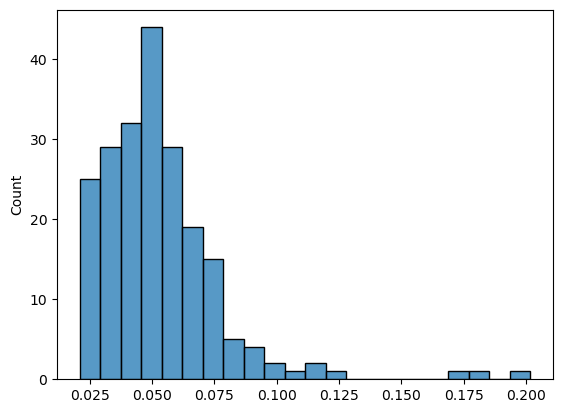

In [9]:
# Visualizing the Real Estate Market Structure.

#Array with segments conencting data points
start_idx, end_idx = np.where(non_zero)
segments = [[np.array([embedding[:, start], embedding[:, stop]]).T, start, stop] for start, stop in zip(start_idx, end_idx)]

#Normalized representation of partial correlation between cities real-estate markets
pc = np.abs(partial_correlations[non_zero])
normalized = (pc - min(pc)) / (max(pc) - min(pc))

#Covariance between cities r-e markets distribution
sns.histplot(pc)

The hist plot reveal that the covariance between the real estate market of Canadian cities is mostly below 0.1.
The next step is to map cities on a 2D plane by first placing each city point using their relative postion data with the help of a scatterplot.
Then we set color of the points according to their cluster followed by a connection to the data from the edge model; the covariance between each city determines the
strength of the connections. 

Note that:
_ map shows only connections with covariance > 0.02
_ covariance > 0.05 are in Red
_ Grey color is for connection between cities in different clusters
_ Same Cluster color between cities in same cluster.




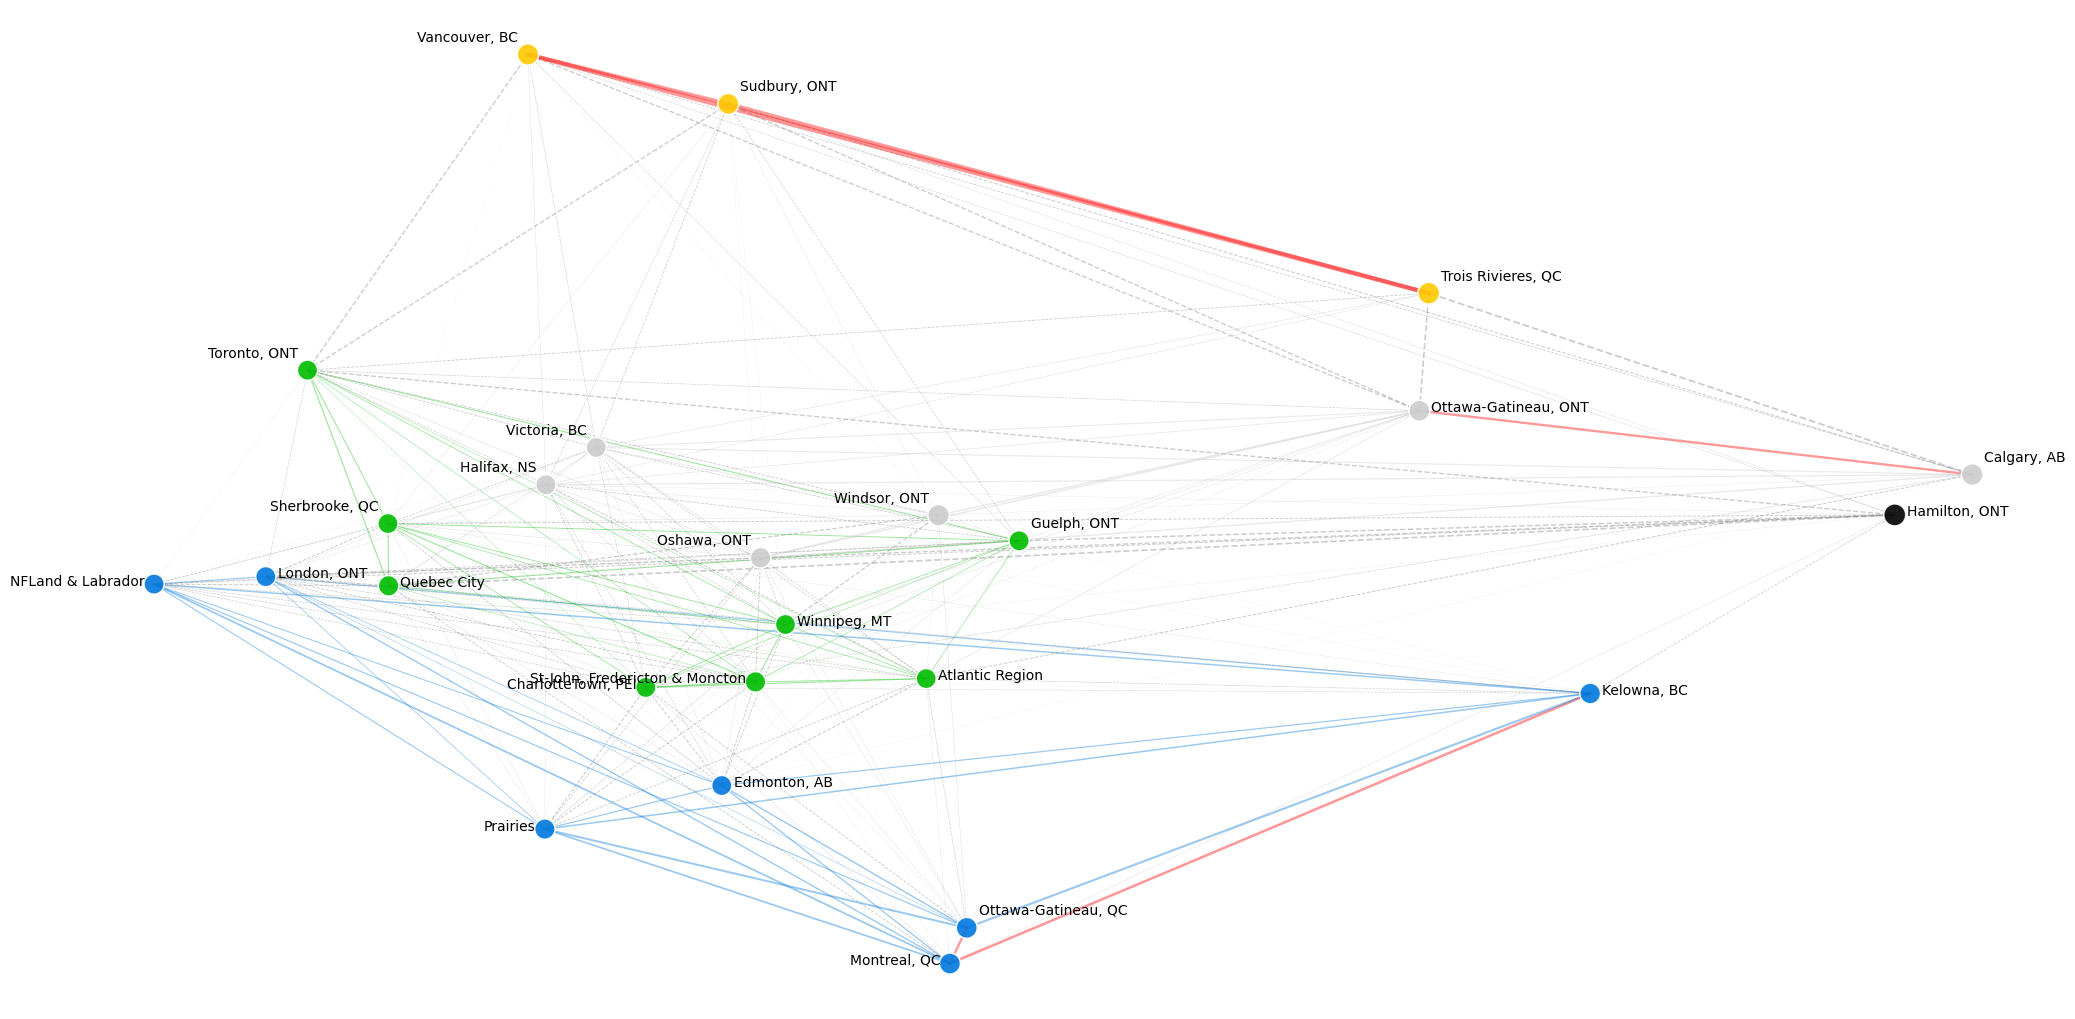

In [10]:
#Visualization
#2D MAP

plt.figure(1, facecolor = 'w', figsize=(20, 10))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])

#Scatterplot for plotting nodes using coordinates from embedding
sc = sns.scatterplot(data = data, x = "embedding_x", y = "embedding_y", zorder = 1, s = 350 * d ** 2, c = labels, cmap = plt.cm.nipy_spectral, alpha = .9, palette = "muted")

line_strength = 3.2

for index, ((x,y), start, stop) in enumerate(segments):
    norm_partial_correlation = normalized[index]
    if list(data.iloc[[start]]['labels'])[0] == list(data.iloc[[stop]]['labels'])[0]:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle ='solid'
        else:
            color = plt.cm.nipy_spectral(list(data.iloc[[start]]['labels'])[0] / float(n_labels)); linestyle = 'solid'
    else:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle ='solid'
        else:
            color = 'grey'; linestyle ='dashed'
    plt.plot(x, y, alpha = .4, zorder = 0, linewidth = normalized[index] * line_strength, color = color, linestyle = linestyle)

#Labelling nodes and positioning labels to avoid overlapping with other labels
for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dy = y - embedding[1]
    dy[index], dx[index] = 1, 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .005
    else:
        horizontalalignment = 'right'
        x = x - .004

    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .01
    else:
        verticalalignment = 'top'
        y = y + .01
    plt.text(x, y, name, size = 10, 
                horizontalalignment = horizontalalignment,
                verticalalignment = verticalalignment)
plt.axis('off')
plt.show()

Covariance between the data of each city is what is used to generate informative 2D & 3D maps.
Covariance is a statistical measure of importance in Finance and Science; in investment strategy, covariance 
measures how two assets move in relation of each other, hence allowing better diversification and volatility 
reduction in a portfolio construction.

Covariance for a one time real estate buyer or seller might not be helpful for their decision making.
However, for investment funds specializing in real-estate investments anticipating trend reversals, price changes 
in one city by monitoring another might provide investment avenues worth exploring.  

The 2d map above shows only connections between cities with a covariance > 0.002.
Connections with a covariance greater than 0.05 are colored in red while, connections between points 
within the same cluster have the cluster's color. The grey bonds are connections between points of different clusters.

Interpretation:

_ looking at the 2D map, Canada has 5 clusters in its real estate market, Hamilton, Ont being its own cluster.

_ strongest covariances are: Montreal <=> Kelowna, Montreal <=> Ottawa,  Ottawa <=> Calgary, Trois Rivieres QC <=> Sudbury <=> Vancouver

_ Cluster 1: Edmonton AB, Prairies(provinces), Kelowna BC, Ottawa-Gatineau QC, Montreal QC, London ONT, NewFoundLand and Labrador
_ Cluster 2: Toronto ONT, Sherbrooke QC, Quebec QC, CharlotteTown PEI, Fredericton & Moncton NB, Winnipeg MT, Guelph ONT, Maritimes
_ Cluster 3: Halifax NS, Windsor ONT, Oshawa ONT, Victoria BC, Ottawa-Gatineau ONT, Calgary AB
_ Cluster 4: Vancouver BC, Trois Rivieres QC, Sudbury ONT.

The idea behind diversification is that different types of assets repond differently to various economic conditions, therefore, a Real-Estate
investor may choose to diversify his risk by investing in the different real-estate market clusters 

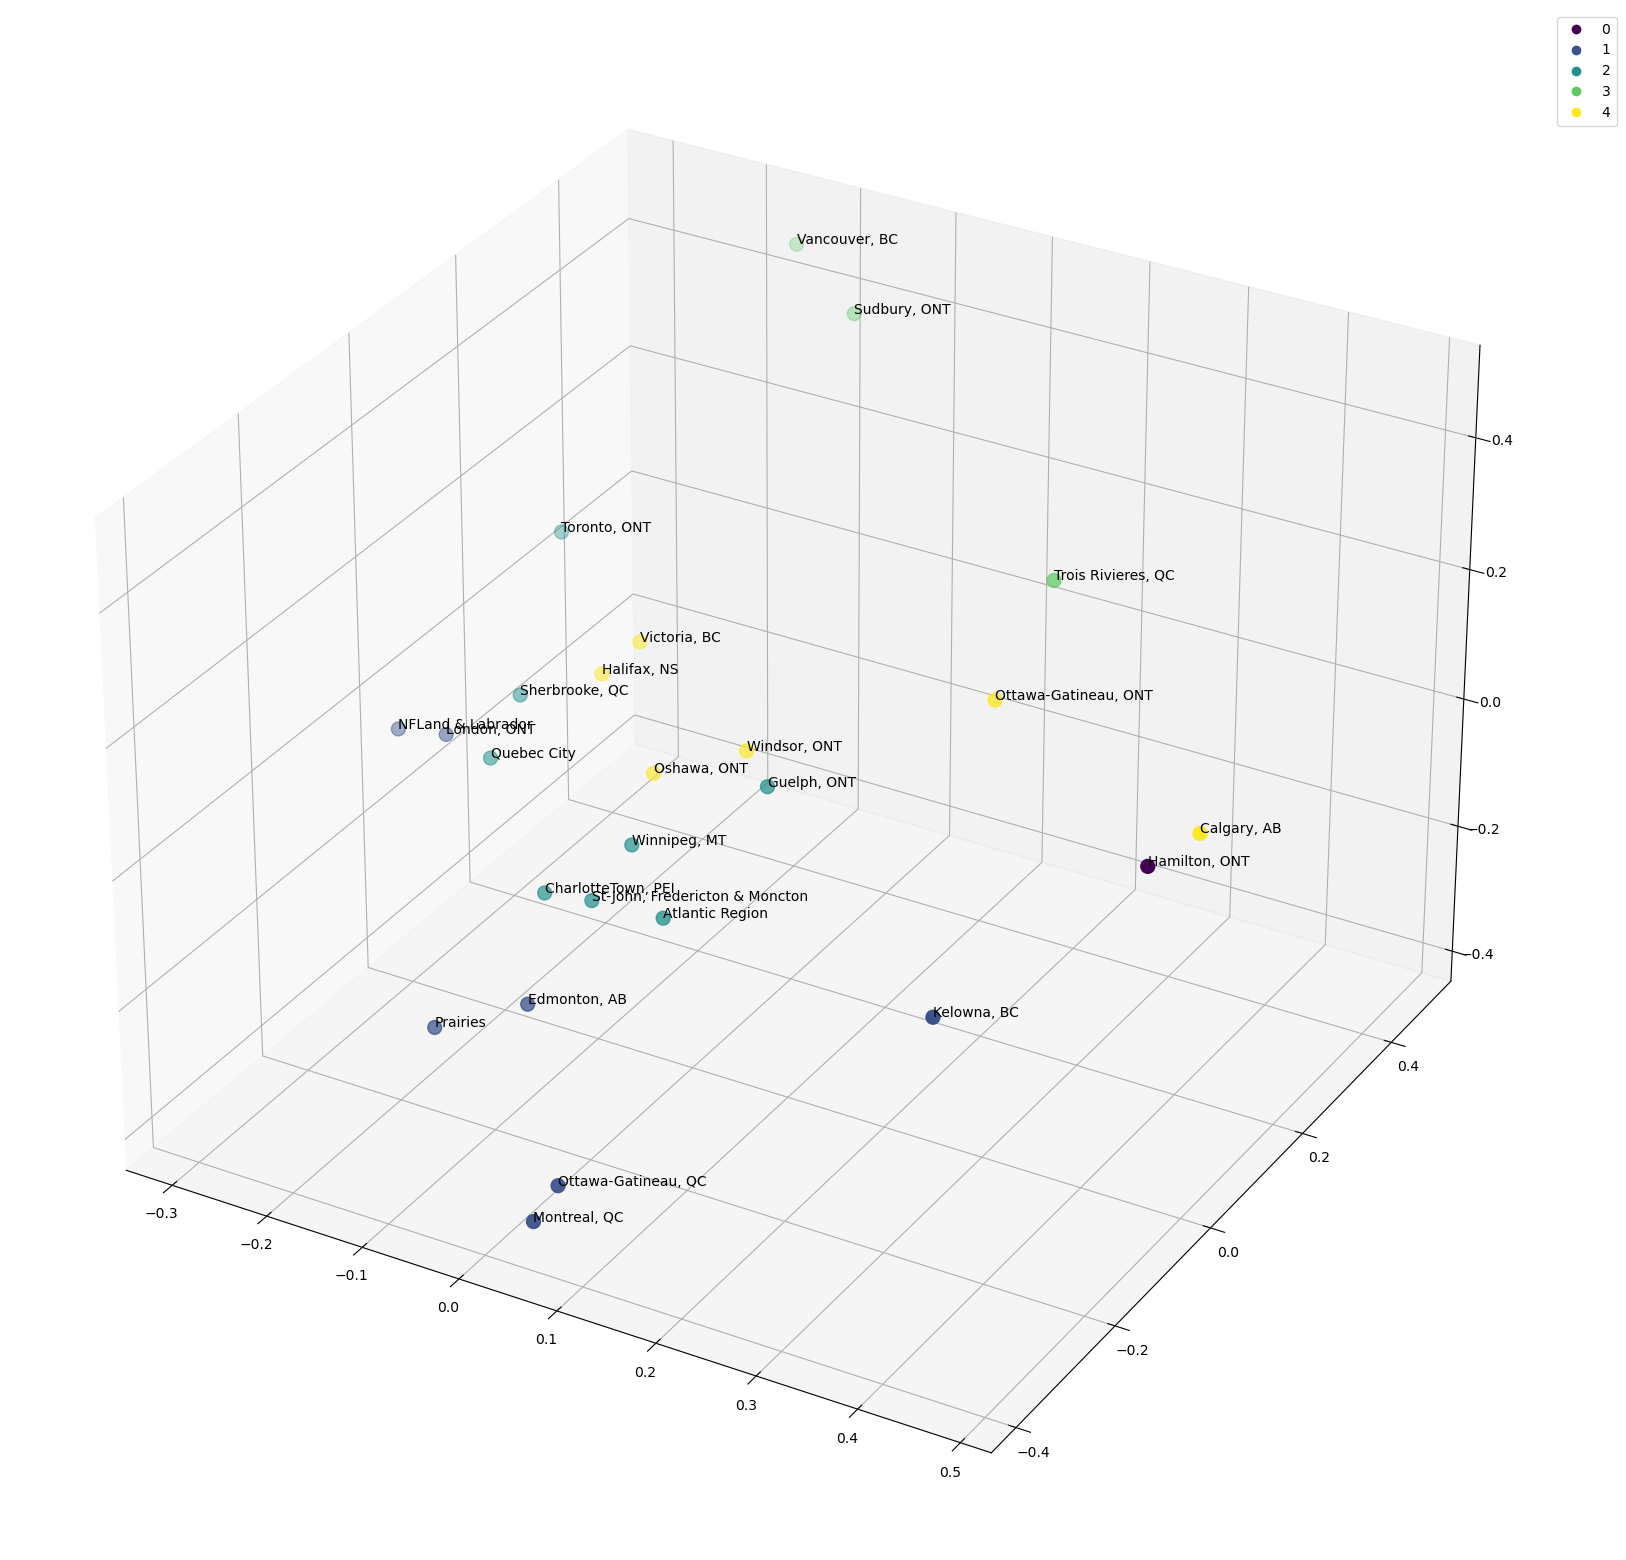

In [11]:
# Find the best position of the cryptos on a 3D plane
#Modules
import matplotlib.pyplot as plt
import numpy as np

node_position_model = manifold.LocallyLinearEmbedding(n_components=3, eigen_solver='dense', n_neighbors=20)
embedding = node_position_model.fit_transform(X.T).T

# x and y coordinates of each city HPI
pd.DataFrame(embedding)

# Partial correlation graphs

partial_correlations = edge_m.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))

partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

data = pd.DataFrame.from_dict({"embedding_x":embedding[0],"embedding_y":embedding[1],"embedding_z":embedding[1]})
data["labels"] = labels
data["names"] = names

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(projection='3d')

xs = data["embedding_x"]
ys = data["embedding_y"]
zs = data["embedding_z"]
sc = ax.scatter(xs, ys, zs, c=labels, s=100)
    
for i in range(len(data)):
    x = xs[i]
    y = ys[i]
    z = zs[i]
    label = data["names"][i]
    ax.text(x, y, z, label)
    
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1, 1), loc=2)
plt.show()